In [9]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [8]:
def evaluatePolicy(env, valueFunctionVector, policy, discountRate, maxIterations, convergenceTolerance):
    convergenceTrack = []
    for _ in range(maxIterations):
        valueFunctionVectorNext = np.zeros(env.observation_space.n)
        for state in env.P:
            total = 0
            for action in env.P[state]:
                actionValue = 0
                for prob, nextState, reward, done in env.P[state][action]:
                    actionValue += prob * (reward + discountRate * valueFunctionVector[nextState])
                total += policy[state, action] * actionValue
            valueFunctionVectorNext[state] = total + np.random.normal(0, 0.001)
        convergenceTrack.append(np.linalg.norm(valueFunctionVectorNext - valueFunctionVector))
        if np.max(np.abs(valueFunctionVectorNext - valueFunctionVector)) < convergenceTolerance:
            return valueFunctionVectorNext, convergenceTrack
        valueFunctionVector = valueFunctionVectorNext
    return valueFunctionVector, convergenceTrack

In [10]:
def improvePolicy(env, valueFunctionVector, numActions, numStates, discountRate, epsilon=0.1):
    qvaluesMatrix = np.zeros((numStates, numActions))
    improvedPolicy = np.zeros((numStates, numActions))

    for state in range(numStates):
        for action in range(numActions):
            for prob, nextState, reward, done in env.P[state][action]:
                qvaluesMatrix[state, action] += prob * (reward + discountRate * valueFunctionVector[nextState])
        bestActions = np.where(qvaluesMatrix[state] == np.max(qvaluesMatrix[state]))[0]
        improvedPolicy[state] = epsilon / numActions
        improvedPolicy[state, bestActions] += (1 - epsilon) / len(bestActions)

    return improvedPolicy, qvaluesMatrix

In [11]:
env = gym.make('FrozenLake-v1', map_name='4x4', is_slippery=False)
discountRate = 0.85
numStates = env.observation_space.n
numActions = env.action_space.n
maxPolicyIterations = 2000
maxEvalIterations = 2000
tolerance = 1e-4
policy = np.ones((numStates, numActions)) / numActions
valueFunction = np.zeros(numStates)

In [5]:
valueFunctionVectorInitial = np.zeros(env.observation_space.n)
maxNumberOfIterationsOfIterativePolicyEvaluation = 1000
convergenceToleranceIterativePolicyEvaluation = 1e-6

rewards_per_iteration = []  # Track rewards per iteration

In [13]:
rewards_per_iteration = []
success_rates = []
training_times = []
stabilities = []

In [14]:
start_time = time.time()
for iteration in range(maxPolicyIterations):
    print(f"Policy Iteration {iteration}")

    t0 = time.time()
    newValueFunction, convergenceTrack = evaluatePolicy(
        env, valueFunction, policy, discountRate, maxEvalIterations, tolerance)
    t1 = time.time()

    policy, qvalues = improvePolicy(env, newValueFunction, numActions, numStates, discountRate, epsilon=0.2)

    rewards_per_iteration.append(np.sum(newValueFunction))
    success_rates.append(np.mean(newValueFunction))
    training_times.append(t1 - t0)
    stabilities.append(np.var(newValueFunction))

    if np.allclose(valueFunction, newValueFunction, atol=1e-3):
        print("Policy converged!")
        break
    valueFunction = newValueFunction

total_time = time.time() - start_time
print(f"Total training time: {total_time:.4f} seconds")

Policy Iteration 0
Policy Iteration 1
Policy Iteration 2
Policy Iteration 3
Policy Iteration 4
Policy Iteration 5
Policy Iteration 6
Policy Iteration 7
Policy Iteration 8
Policy Iteration 9
Policy Iteration 10
Policy Iteration 11
Policy Iteration 12
Policy Iteration 13
Policy Iteration 14
Policy Iteration 15
Policy Iteration 16
Policy Iteration 17
Policy Iteration 18
Policy Iteration 19
Policy Iteration 20
Policy Iteration 21
Policy Iteration 22
Policy Iteration 23
Policy Iteration 24
Policy Iteration 25
Policy Iteration 26
Policy Iteration 27
Policy Iteration 28
Policy Iteration 29
Policy Iteration 30
Policy Iteration 31
Policy Iteration 32
Policy Iteration 33
Policy Iteration 34
Policy Iteration 35
Policy Iteration 36
Policy Iteration 37
Policy Iteration 38
Policy Iteration 39
Policy Iteration 40
Policy Iteration 41
Policy Iteration 42
Policy Iteration 43
Policy Iteration 44
Policy Iteration 45
Policy Iteration 46
Policy Iteration 47
Policy Iteration 48
Policy Iteration 49
Policy Ite


Final Policy:
↓ → ↓ ←
↓ ← ↓ ←
→ ↓ ↓ ←
← → → ←


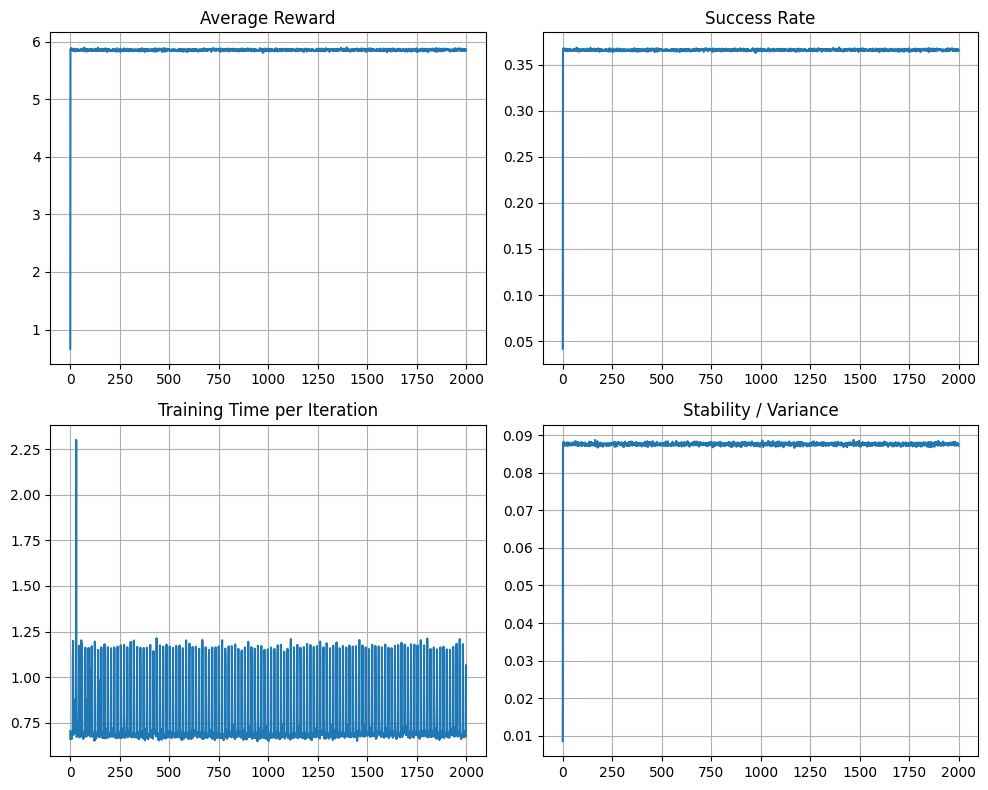

In [15]:
# Action mapping
action_mapping = {0: '←', 1: '↓', 2: '→', 3: '↑'}
derived_policy = np.array([action_mapping[np.argmax(row)] for row in policy]).reshape(4, 4)

print("\nFinal Policy:")
for row in derived_policy:
    print(" ".join(row))

# === Plotting metrics ===
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(rewards_per_iteration)
axs[0, 0].set_title("Average Reward")
axs[0, 1].plot(success_rates)
axs[0, 1].set_title("Success Rate")
axs[1, 0].plot(training_times)
axs[1, 0].set_title("Training Time per Iteration")
axs[1, 1].plot(stabilities)
axs[1, 1].set_title("Stability / Variance")

for ax in axs.flat:
    ax.grid(True)

plt.tight_layout()
plt.show()
